In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

In [3]:
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset' 
classes = [i for i in os.listdir(fish_dir) if '.' not in i]                    
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

In [4]:
label = []
path = []

for dir_name, _,filenames in os.walk(fish_dir):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':               # If filename contains .png
            if dir_name.split()[-1]!='GT':                       # If directory doesn't contain GT
                label.append(os.path.split(dir_name)[-1])         # Append the directory name to label 
                path.append(os.path.join(dir_name,filename))     # Append all the png files to path of that directory

data = pd.DataFrame(columns=['path','label'])
data['path']=path
data['label']=label

In [5]:
print(data.head())
print(data.info())
print(data['label'].value_counts())

                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB
None
label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64


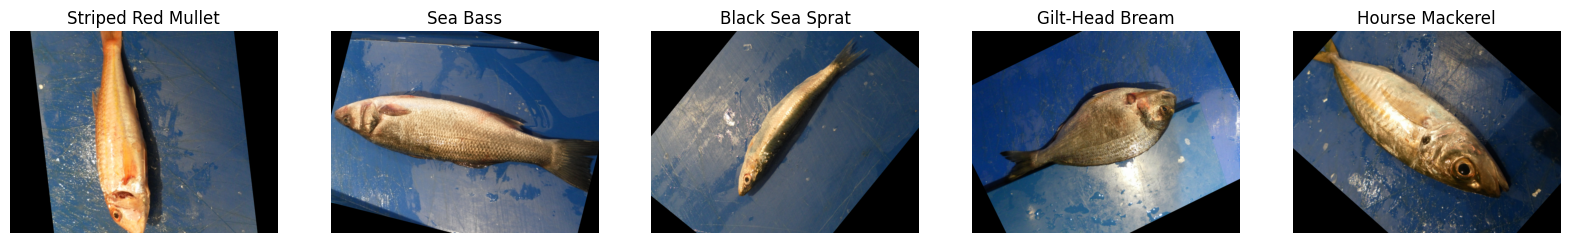

In [6]:
def plot_sample_images(data, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    for i in range(num_samples):
        sample = data.sample().iloc[0]
        img = load_img(sample['path'])
        axes[i].imshow(img)
        axes[i].set_title(sample['label'])
        axes[i].axis('off')
    plt.show()

plot_sample_images(data)

In [7]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

In [8]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    return img_array / 255.0  # Normalize pixel values

In [9]:
# Prepare X_train and y_train
X_train = np.array([load_and_preprocess_image(path) for path in train_data['path']])
y_train = pd.get_dummies(train_data['label']).values

# Prepare X_test and y_test
X_test = np.array([load_and_preprocess_image(path) for path in test_data['path']])
y_test = pd.get_dummies(test_data['label']).values

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (7200, 224, 224, 3)
Test set shape: (1800, 224, 224, 3)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.2476 - loss: 2.0277 - val_accuracy: 0.7188 - val_loss: 0.8741
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.5680 - loss: 1.1550 - val_accuracy: 0.8792 - val_loss: 0.5320
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.7226 - loss: 0.7611 - val_accuracy: 0.9153 - val_loss: 0.3471
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.7672 - loss: 0.6162 - val_accuracy: 0.9181 - val_loss: 0.3193
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.8014 - loss: 0.5103 - val_accuracy: 0.9569 - val_loss: 0.1581
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.8403 - loss: 0.3969 - val_accuracy: 0.9493 - val_loss: 0.1593
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.8636 - loss: 0.3541 - val_accuracy: 0.9757 - val_loss: 0.0835
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.8716 - loss: 0.3178 - val_accu

57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 439ms/step - accuracy: 0.9592 - loss: 0.1142
Test accuracy: 0.9578


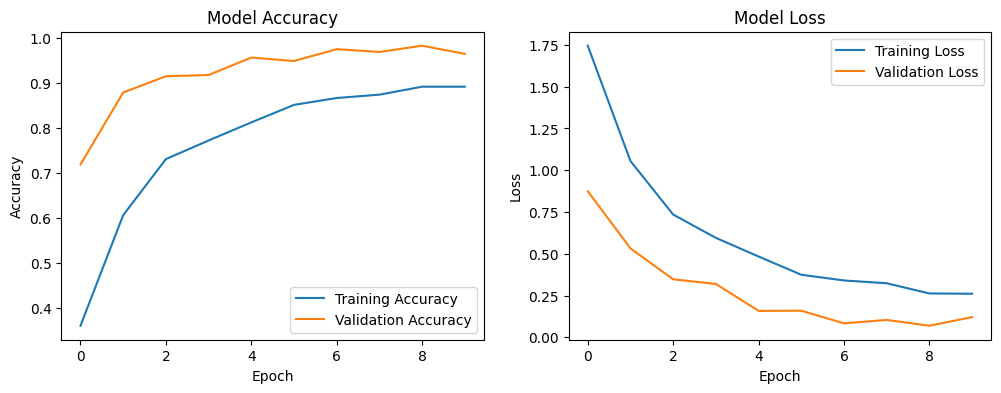

57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 441ms/step
                    precision    recall  f1-score   support

   Hourse Mackerel       0.95      0.96      0.96       200
   Black Sea Sprat       0.97      0.98      0.98       200
          Sea Bass       0.93      0.95      0.94       200
        Red Mullet       0.99      0.93      0.96       200
             Trout       0.98      0.99      0.99       200
Striped Red Mullet       0.90      0.95      0.93       200
            Shrimp       0.98      0.94      0.96       200
   Gilt-Head Bream       0.97      0.91      0.94       200
     Red Sea Bream       0.96      0.99      0.97       200

          accuracy                           0.96      1800
         macro avg       0.96      0.96      0.96      1800
      weighted avg       0.96      0.96      0.96      1800



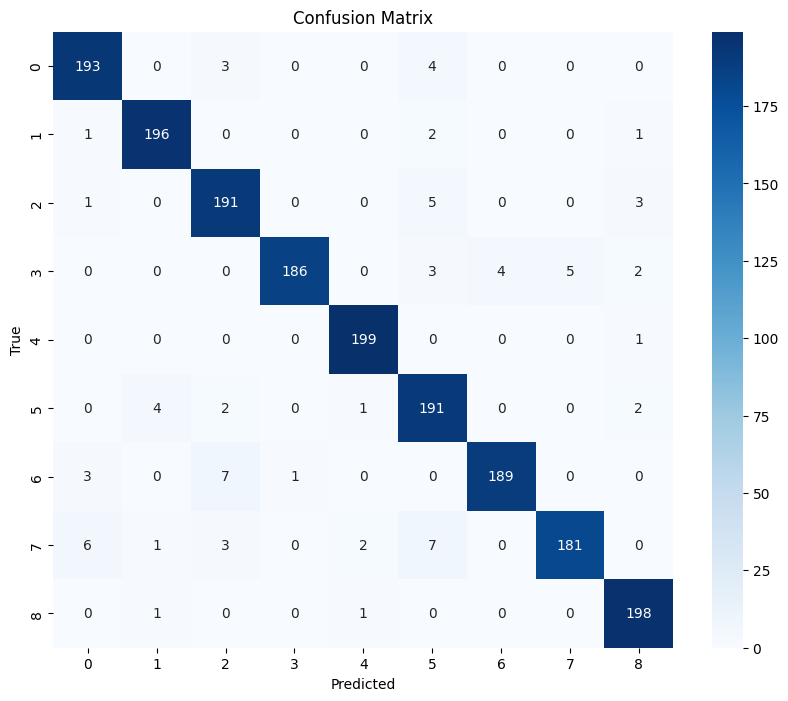

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=data['label'].unique()))

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 434ms/step


In [15]:
print(classification_report(y_true_classes, y_pred_classes, target_names=data['label'].unique()))

                    precision    recall  f1-score   support

   Hourse Mackerel       0.95      0.96      0.96       200
   Black Sea Sprat       0.97      0.98      0.98       200
          Sea Bass       0.93      0.95      0.94       200
        Red Mullet       0.99      0.93      0.96       200
             Trout       0.98      0.99      0.99       200
Striped Red Mullet       0.90      0.95      0.93       200
            Shrimp       0.98      0.94      0.96       200
   Gilt-Head Bream       0.97      0.91      0.94       200
     Red Sea Bream       0.96      0.99      0.97       200

          accuracy                           0.96      1800
         macro avg       0.96      0.96      0.96      1800
      weighted avg       0.96      0.96      0.96      1800



In [17]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=32),
                     (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(2, 2))
    
    for i in range(hp.Int('num_conv_layers', 1, 3)):
        model.add(Conv2D(hp.Int(f'conv{i+2}_units', min_value=32, max_value=128, step=32),
                         (3, 3), activation='relu'))
        model.add(MaxPooling2D(2, 2))
    
    model.add(Flatten())
    
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        model.add(Dense(hp.Int(f'dense{i+1}_units', min_value=32, max_value=256, step=32),
                        activation='relu'))
        model.add(Dropout(hp.Float(f'dropout{i+1}', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [18]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,
    directory='hyper_tuning',
    project_name='fish_classification'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=3, validation_split=0.3)

Trial 3 Complete [00h 21m 13s]
val_accuracy: 0.9337962865829468

Best val_accuracy So Far: 0.9583333134651184
Total elapsed time: 05h 34m 51s


In [19]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(best_hyperparameters.values)

Best Hyperparameters:
{'conv1_units': 128, 'num_conv_layers': 3, 'conv2_units': 96, 'num_dense_layers': 2, 'dense1_units': 64, 'dropout1': 0.2, 'learning_rate': 0.0013556239419633572, 'conv3_units': 64, 'conv4_units': 64, 'dense2_units': 192, 'dropout2': 0.0}


/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [20]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Best model test accuracy: {test_accuracy:.5f}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9486 - loss: 0.1468
Best model test accuracy: 0.94278


NameError: name 'pred_df' is not defined